In [1]:
%config IPCompleter.greedy=True
%pylab inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import librosa



Populating the interactive namespace from numpy and matplotlib


# Music Genre Classification - Neural Network Training on Spectrogram Images

## Having an overview on genres images

(4000, 4000, 4)

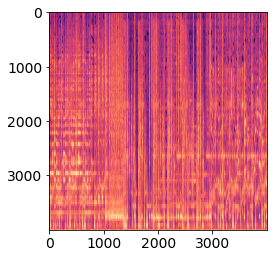

In [7]:
import os
import time
import matplotlib.image as mpimg

spectrograms_dir = "./datasets/spectrograms"

img_path =  "./datasets/spectrograms/hiphop/hiphop.00000.mp3_spectrogram_FULLSIZE.png"


img = mpimg.imread(img_path)
plt.imshow(img)
img.shape

### Traininig a Convolutionnal Neural network

In [8]:
from keras_preprocessing.image import ImageDataGenerator
import shutil

img_height, img_width = 64, 64
batch_size = 32

train_data_dir = "./datasets/spectrograms/"

# shutil.rmtree(f"{train_data_dir}.ipynb_checkpoints") 

train_datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    subset='validation') # set as validation data



Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [9]:
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_height, img_width,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [10]:

#Fitting keras model, no test gen for now
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size


history = model.fit(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=5,
)
model.evaluate_generator(generator=validation_generator, steps=STEP_SIZE_VALID
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
10/25 [===========>..................] - ETA: 2:22 - loss: 2.3226 - accuracy: 0.0906

KeyboardInterrupt: 

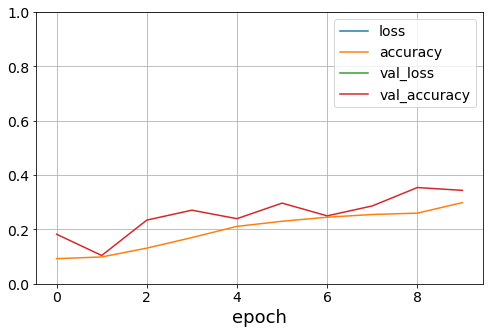

In [53]:
# mse_test = model.evaluate(X_test, y_test)

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.show()

In [31]:
# model_path = "./models/musicgenre_nn_classifier_v1.h5"
# model.save(model_path)
# model = keras.models.load_model(model_path)
model.predict(X)

array([[7.77258798e-02, 4.84767035e-02, 1.19989716e-01, ...,
        3.31462100e-02, 4.57172915e-02, 2.26929024e-01],
       [1.99620739e-01, 1.19231148e-02, 2.89957635e-02, ...,
        7.82633666e-03, 9.31608677e-02, 1.76279381e-01],
       [4.08248037e-01, 3.38145555e-03, 2.72053272e-01, ...,
        5.24243228e-02, 1.27489576e-02, 2.03344017e-01],
       ...,
       [1.97777580e-02, 3.51431445e-05, 3.26157920e-02, ...,
        3.66544991e-05, 2.13286621e-04, 8.49649131e-01],
       [1.01545058e-01, 7.40389060e-03, 2.46231332e-01, ...,
        3.16512473e-02, 7.19827265e-02, 4.71968353e-01],
       [4.85825539e-02, 1.07151400e-02, 2.25675687e-01, ...,
        7.91723467e-03, 1.41044026e-02, 5.30412078e-01]], dtype=float32)